In [9]:
using QuantumOptics
using PyPlot

In [10]:
N = 20
b = NLevelBasis(N)
t = 1
Htb = SparseOperator(b)
for i in 1:N-1
    Htb += -t*transition(b,i+1,i)
end
# PBC
Htb += -t*transition(b,1,N)
Htb += Htb'

Operator(dim=20x20)
  basis: NLevel(N=20)sparse([2, 20, 1, 3, 2, 4, 3, 5, 4, 6  …  15, 17, 16, 18, 17, 19, 18, 20, 1, 19], [1, 1, 2, 2, 3, 3, 4, 4, 5, 5  …  16, 16, 17, 17, 18, 18, 19, 19, 20, 20], ComplexF64[-1.0 + 0.0im, -1.0 + 0.0im, -1.0 + 0.0im, -1.0 + 0.0im, -1.0 + 0.0im, -1.0 + 0.0im, -1.0 + 0.0im, -1.0 + 0.0im, -1.0 + 0.0im, -1.0 + 0.0im  …  -1.0 + 0.0im, -1.0 + 0.0im, -1.0 + 0.0im, -1.0 + 0.0im, -1.0 + 0.0im, -1.0 + 0.0im, -1.0 + 0.0im, -1.0 + 0.0im, -1.0 + 0.0im, -1.0 + 0.0im], 20, 20)

In [11]:
Nparticles = 2
b_mb = ManyBodyBasis(b, bosonstates(b, Nparticles))

ManyBody(onebodybasis=NLevel(N=20), states:210)

In [12]:
U = 2.0

H_int = SparseOperator(b_mb)
for i in 1:N
    H_int += U*number(b_mb,i)*(number(b_mb,i)-identityoperator(b_mb))
end

In [13]:
H_mb = manybodyoperator(b_mb, Htb) + H_int
Emb, Umb = eigenstates(dense(H_mb));
Emb

210-element Vector{Float64}:
 -3.9592113152909634
 -3.78926392302875
 -3.789263923028749
 -3.7650937088446534
 -3.765093708844653
 -3.633161481482974
 -3.4527377297242197
 -3.452737729724219
 -3.4159491757377576
 -3.4159491757377567
 -3.3072876279313386
 -3.3072876279313377
 -3.2019162277445825
  ⋮
  4.639812932146933
  4.898979484843349
  4.898979484843362
  5.145107969288794
  5.145107969288805
  5.3574510500976436
  5.357451050097645
  5.5201573025269495
  5.52015730252695
  5.622139356477069
  5.622139356477073
  5.656854374535847

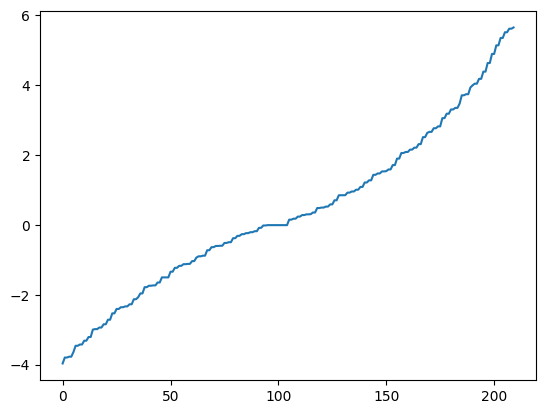

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7fc0461dc070>

In [14]:
plot(Emb)